In [1]:
import numpy as np
import math
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import rc
from numpy import asarray
from numpy import savetxt
from numpy.lib.arraypad import pad
from logging import exception
from scipy.stats import entropy

In [2]:
labels = [ "No Deception", "Proposed Multi-Agent Deception", "Random Deception", "Attack Only Agent 0",  "Attack Only Agent 1", "Attack Only Agent 2", "Type I Attack", "Active Learning RL Deception", "Proposed Deception", "Single-Stream RL Deception", "ST Attack"]
colors = [ "black", "blue", "red", "yellow", "orange", "brown", "green", "green", "blue", "brown", 'olive']
files_def_act = ['NoAttck_action_def_list', 'NewerAttck_action_def_list', 'RandomAttck_action_def_list', 'Agent0Attck_action_def_list', 'Agent1Attck_action_def_list', 'Agent2Attck_action_def_list', 'TypeIAttck_action_def_list', 'GreedyTurboAttck_action_def_list', 'TurboAttck_action_def_list', 'SingleTurboAttck_action_def_list']
files_adv_act = ['NoAttck_action_adv_list', 'NewerAttck_action_adv_list', 'RandomAttck_action_adv_list', 'Agent0Attck_action_adv_list', 'Agent1Attck_action_adv_list', 'Agent2Attck_action_adv_list', 'TypeIAttck_action_adv_list', 'GreedyTurboAttck_action_adv_list', 'TurboAttck_action_adv_list', 'SingleTurboAttck_action_adv_list']
# files_R = ['NoAttck_reward_list', 'NewerAttck_reward_list', 'RandomAttck_reward_list', 'Agent0Attck_reward_list', 'Agent1Attck_reward_list', 'Agent2Attck_reward_list', 'TypeIAttck_reward_list', 'GreedyTurboAttck_reward_list', 'TurboAttck_reward_list', 'SingleTurboAttck_reward_list', 'STAttck_reward_list_080']
files_R = ['NoDeception_reward_list', 'NewerAttck_reward_list', 'RandomAttck_reward_list', 'Agent0Attck_reward_list', 'Agent1Attck_reward_list', 'Agent2Attck_reward_list', 'TypeIAttck_reward_list', 'GreedyTurboAttck_reward_list', 'TurboAttck_reward_list', 'SingleTurboAttck_reward_list', 'STAttck_reward_list_080']
files_C = ['NoAttck_budget', 'NewerAttck_budget', 'RandomAttck_budget', 'Agent0Attck_budget', 'Agent1Attck_budget', 'Agent2Attck_budget', 'TypeIAttck_budget', 'GreedyTurboAttck_budget', 'TurboAttck_budget', 'SingleTurboAttck_budget', 'STAttck_spatial_used_list_080']
styles = ['solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', "solid", 'solid', 'solid']

In [3]:
max_num = 100
T = 500

In [4]:
budget = np.load(files_adv_act[2] + '.npy')
print(budget[2])

[[-1. -1. -1. ... -1. -1. -1.]
 [ 3.  4.  4. ...  6.  3. -1.]
 [ 0.  5.  6. ...  4.  5. -1.]
 ...
 [ 0.  4.  3. ...  1.  6. -1.]
 [ 0.  2.  2. ...  0.  1. -1.]
 [ 6.  6.  6. ...  4.  6. -1.]]


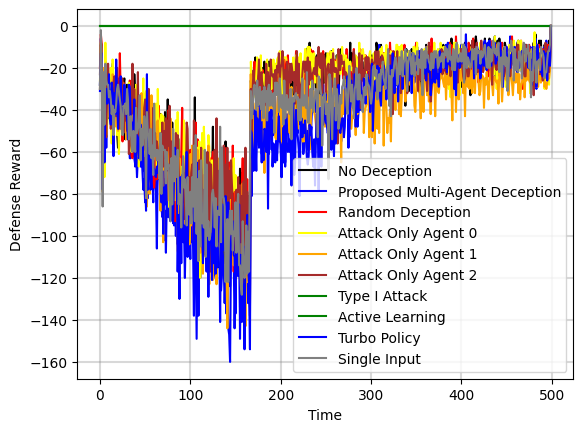

In [13]:
plt.rcdefaults()
fontsize = 22; width = 0.2
i_list = [0, 1, 7, 2, 3, 4, 5, 6, 7, 8, 9]

for i in i_list:
    R_list = np.load( files_R[i] + '.npy')
    R_plt = np.sum(R_list,axis=0)
    plt.plot(np.arange(T) , R_plt, label=labels[i], color=colors[i], linestyle=styles[i])

plt.ylabel("Defense Reward")
plt.xlabel("Time")
plt.legend()
plt.grid(color='gray', linestyle='-', linewidth=1.5, alpha=0.3)
plt.show()


-171.45
-167.43
-165.9
0.0
-232.63


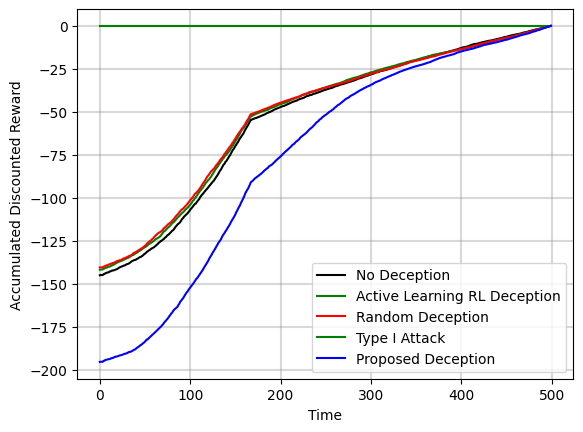

In [8]:
plt.rcdefaults()
fontsize = 22; width = 0.2
# i_list = [0, 1, 2, 3, 4, 5, 6, 8]
i_list = [0, 7, 2, 6, 8]

gamma = 0.999

for i in i_list:
    R_list = np.load(files_R[i] + '.npy')  # Shape: (num_runs, T)
    print(np.mean(np.sum(R_list,axis=1)))
    # Compute discounted accumulated reward for each run
    G_list = []
    for R in R_list:
        G = np.zeros_like(R)
        acc = 0.0
        for t in reversed(range(len(R))):
            acc = R[t] + gamma * acc
            G[t] = acc
        G_list.append(G)
    
    G_list = np.array(G_list)
    G_mean = np.mean(G_list, axis=0)

    plt.plot(np.arange(len(G_mean)), G_mean, label=labels[i], color=colors[i], linestyle=styles[i])

plt.ylabel("Accumulated Discounted Reward")
plt.xlabel("Time")
plt.legend()
plt.grid(color='gray', linestyle='-', linewidth=1.5, alpha=0.3)
plt.show()


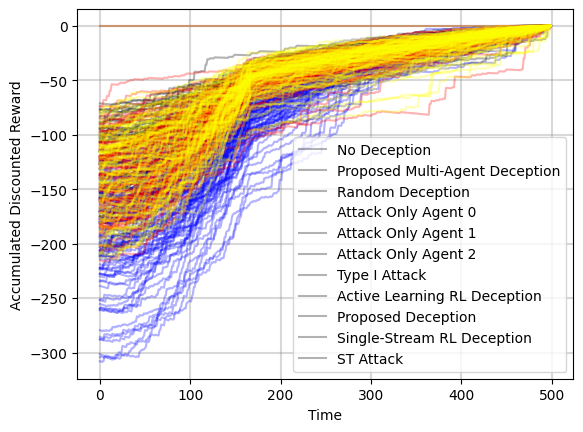

In [41]:
plt.rcdefaults()
fontsize = 22; width = 0.2
i_list = [0, 1, 2, 3]
gamma = 0.999

for i in i_list:
    R_list = np.load(files_R[i] + '.npy')  # Shape: (num_runs, T)

    for R in R_list:
        G = np.zeros_like(R)
        acc = 0.0
        for t in reversed(range(len(R))):
            acc = R[t] + gamma * acc
            G[t] = acc
        plt.plot(np.arange(len(G)), G, color=colors[i], linestyle=styles[i], alpha=0.3)

plt.ylabel("Accumulated Discounted Reward")
plt.xlabel("Time")
plt.legend(labels)  # Only one legend entry per group
plt.grid(color='gray', linestyle='-', linewidth=1.5, alpha=0.3)
plt.show()


-132.9480190529955
-113.22751570759321
-45.74241219573299

-195.2608424572767
-169.91282390967922
-57.68525295141743

-140.35742638844462
-119.79282587617668
-48.72402732181484

-141.67221831532734
-121.68261755785475
-47.70099511616961

-165.3436722051655
-142.03613879212435
-51.25237850837286

-157.15316225974078
-132.61628542401849
-51.02165238158886



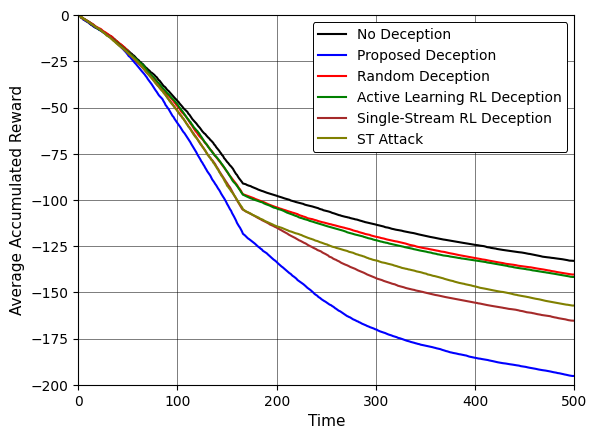

In [58]:
plt.rcdefaults()
fontsize = 11; width = 0.2
i_list = [0, 8, 2, 7, 9, 10]

gamma = 0.999

for i in i_list:
    R_list = np.load(files_R[i] + '.npy')  # Shape: (num_runs, T)
    G_list = []
    # print(np.mean(np.sum(R_list,axis=1)))

    # Compute discounted accumulated reward for each run
    for R in R_list:
        G = np.zeros_like(R)
        acc = 0.0
        for t in (range(len(R))):
            # acc = R[t] + gamma * acc
            acc += (gamma**t)*R[t]
            # acc = R[t] + gamma * acc
            G[t] = acc
        G_list.append(G)

    G_list = np.array(G_list)  # Shape: (num_runs, T)
    G_mean = np.mean(G_list, axis=0)
    G_std = np.std(G_list, axis=0)

    t_range = np.arange(G_mean.shape[0])
    print(G_mean[-1])
    print(G_mean[-201])
    print(G_mean[-401])
    print()
    plt.plot(t_range, G_mean, label=labels[i], color=colors[i], linestyle=styles[i])
    # plt.fill_between(t_range, G_mean - G_std, G_mean + G_std,
    #                  color=colors[i], alpha=0.2)
plt.xlim([0,500])
plt.ylim([-200, 0])
plt.ylabel("Average Accumulated Reward", fontsize=fontsize)
plt.xlabel("Time", fontsize=fontsize)
# plt.legend()
legend = plt.legend(frameon=True, fontsize=fontsize-1)

# Customize legend frame to match the grid
frame = legend.get_frame()
frame.set_edgecolor('black')
frame.set_linestyle('-')
frame.set_linewidth(0.7)
frame.set_alpha(1)


plt.grid(color='black', linestyle='-', linewidth=0.4, alpha=0.9)
plt.savefig("res1.jpg", dpi=300)
plt.show()


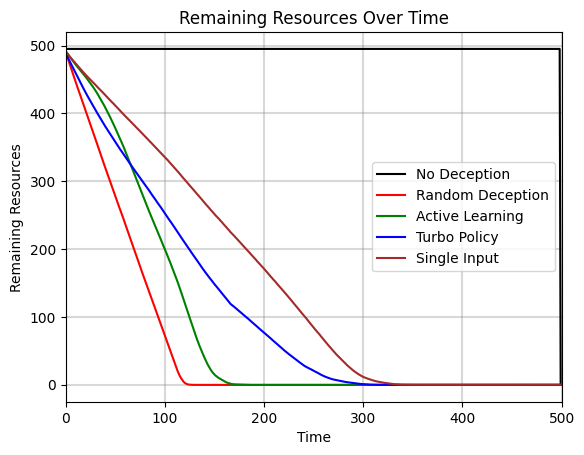

In [5]:
plt.rcdefaults()
fontsize = 22
# i_list = [0, 1, 2, 3, 4, 5, 6,7, 8]

for i in i_list:
    budget_list = np.load(files_C[i] + '.npy')  # shape: (num_runs, T)
    remaining_budget = np.mean(budget_list, axis=0)  # average across runs
    
    plt.plot(np.arange(len(remaining_budget)), remaining_budget, label=labels[i], color=colors[i], linestyle=styles[i])
plt.xlim([0, 500])
plt.ylabel("Remaining Resources")
plt.xlabel("Time")
plt.legend()
plt.grid(color='gray', linestyle='-', linewidth=1.5, alpha=0.3)
plt.title("Remaining Resources Over Time")
plt.show()


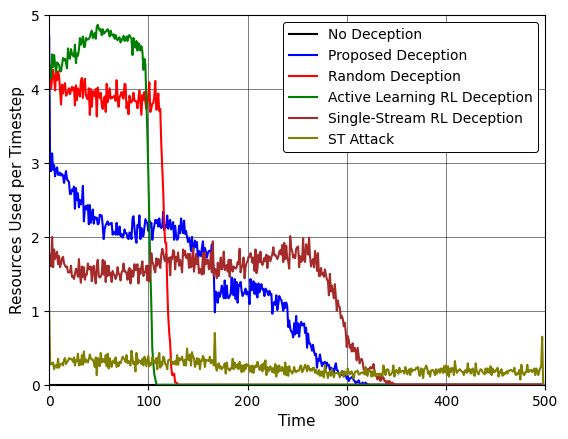

In [48]:
plt.rcdefaults()
# i_list = [0, 1, 2, 3, 4, 5, 7, 8]
# i_list = [2]
for i in i_list:
    # if i != 10:
    budget_list = np.load(files_C[i] + '.npy')  # shape: (runs, T)
    # budget_list[]
    # # print(i)
    # print(budget_list[10])
    
    # Compute usage as difference between consecutive timesteps
    used_per_timestep = budget_list[:, :-1] - budget_list[:, 1:]
    # print(used_per_timestep[10])
    # Optional: clip negatives (if budget increases due to reset)
    used_per_timestep = np.clip(used_per_timestep, 0, 5)

    used_avg = np.mean(used_per_timestep, axis=0)
# elif i == 10:
    budget_list = np.load(files_C[i] + '.npy')  # shape: (runs, T)
        # print(budget_list[4])
    if i == 0:
        used_avg[-1] = 0
    plt.plot(np.arange(len(used_avg)), used_avg, label=labels[i], color=colors[i], linestyle=styles[i])

plt.ylabel("Resources Used per Timestep", fontsize=fontsize)
plt.xlabel("Time", fontsize=fontsize)
plt.xlim([0, 500])
plt.ylim([0, 5])
legend = plt.legend(frameon=True, fontsize=fontsize-1)

# Customize legend frame to match the grid
frame = legend.get_frame()
frame.set_edgecolor('black')
frame.set_linestyle('-')
frame.set_linewidth(0.7)
frame.set_alpha(1)


plt.grid(color='black', linestyle='-', linewidth=0.4, alpha=0.9)
# plt.title("Resources Used Over Time")
plt.savefig("res2.jpg", dpi=300)
plt.show()


(5, 100, 500)
(100, 500)
(5, 500)


/tmp/ipykernel_2166020/712499768.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Blues', 6)  # 6 distinct blues


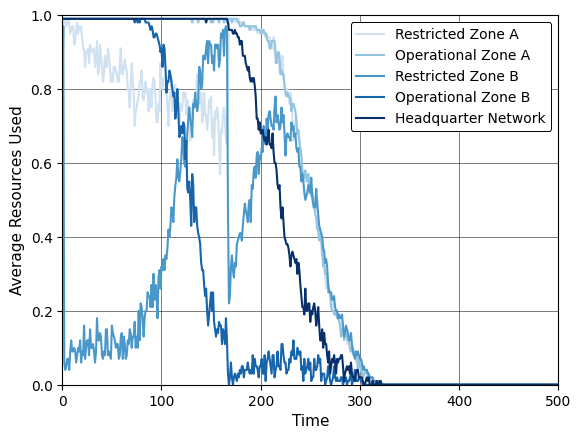

In [5]:
import matplotlib.cm as cm
plt.rcdefaults()
i = 8  # Index for Proposed Multi-Agent Deception
actions = np.load(files_adv_act[i] + '.npy')  # shape: (runs, T, 5)
budget = np.load(files_C[i] + '.npy')  # shape: (runs, T, 5)
fontsize = 11

# Count resource use: non-zero actions mean resource used
resource_use = (actions != 0).astype(int)  # shape: (runs, T, 5)
print(resource_use.shape)
print(budget.shape)
resource_use[:, budget < 1] = 0


# Average across runs
avg_resource_use = np.mean(resource_use, axis=1)  # shape: (T, 5)

cmap = cm.get_cmap('Blues', 6)  # 6 distinct blues



print(avg_resource_use.shape)
# Plot
for agent_id in range(5):
    if agent_id == 0:
        label = 'Restricted Zone A'
    elif agent_id == 1:
        label = "Operational Zone A"
    elif agent_id == 2:
        label = "Restricted Zone B"
    elif agent_id == 3:
        label = "Operational Zone B"    
    elif agent_id == 4:
        label = "Headquarter Network"    

    plt.plot(np.arange(500), avg_resource_use[agent_id, :],
             label=label, linestyle='solid', color=cmap(agent_id + 1))

plt.ylabel("Average Resources Used", fontsize=fontsize)
plt.xlabel("Time", fontsize=fontsize)
plt.xlim([0, 500])
plt.ylim([0, 1])

legend = plt.legend(frameon=True, fontsize=fontsize-1)

# Customize legend frame to match the grid
frame = legend.get_frame()
frame.set_edgecolor('black')
frame.set_linestyle('-')
frame.set_linewidth(0.7)
frame.set_alpha(1)


plt.grid(color='black', linestyle='-', linewidth=0.4, alpha=0.9)
# plt.title(f"Sub-Network Resource Usage Over Time ({labels[i]})")
plt.savefig("res3.jpg", dpi=300)

plt.show()


(5,)


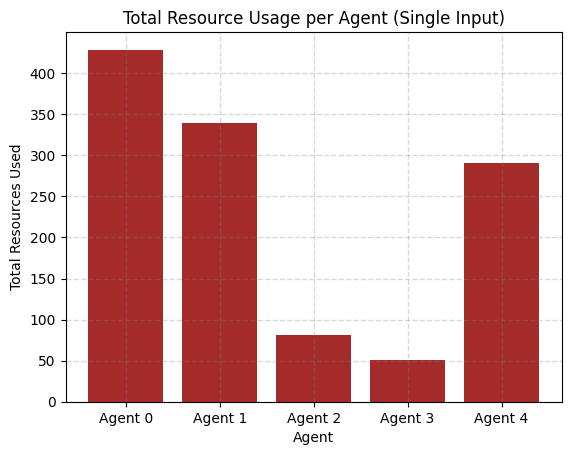

In [32]:
# Sum over time
# i = 6  # Index for Proposed Multi-Agent Deception
actions = np.load(files_adv_act[i] + '.npy')  # shape: (runs, T, 5)


# Count resource use: non-zero actions mean resource used
resource_use = (actions != 0).astype(int)  # shape: (runs, T, 5)
avg_resource_use = np.mean(resource_use, axis=1)  # shape: (T, 5)

total_usage = np.sum(avg_resource_use, axis=1)  # shape: (5,)
print(total_usage.shape)
plt.rcdefaults()
plt.bar(np.arange(5), total_usage, color=colors[i])
plt.xticks(np.arange(5), [f"Agent {i}" for i in range(5)])
plt.ylabel("Total Resources Used")
plt.xlabel("Agent")
plt.grid(color='gray', linestyle='--', linewidth=1.0, alpha=0.3)
plt.title(f"Total Resource Usage per Agent ({labels[i]})")
plt.show()


(5,)


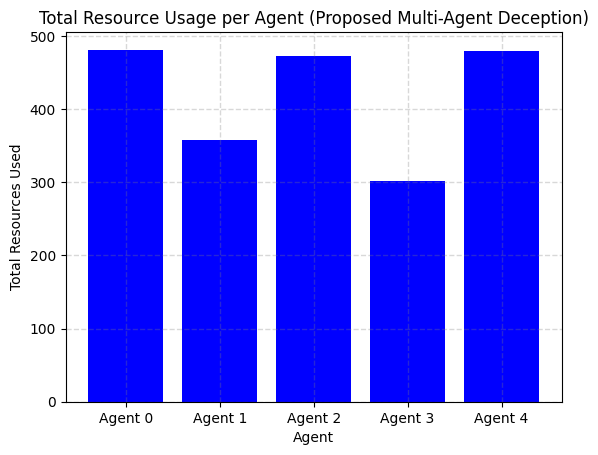

In [37]:
# Sum over time
i = 1  # Index for Proposed Multi-Agent Deception
actions = np.load(files_adv_act[i] + '.npy')  # shape: (runs, T, 5)


# Count resource use: non-zero actions mean resource used
resource_use = (actions != 0).astype(int)  # shape: (runs, T, 5)
avg_resource_use = np.mean(resource_use, axis=1)  # shape: (T, 5)

total_usage = np.sum(avg_resource_use, axis=1)  # shape: (5,)
print(total_usage.shape)
plt.rcdefaults()
plt.bar(np.arange(5), total_usage, color=colors[i])
plt.xticks(np.arange(5), [f"Agent {i}" for i in range(5)])
plt.ylabel("Total Resources Used")
plt.xlabel("Agent")
plt.grid(color='gray', linestyle='--', linewidth=1.0, alpha=0.3)
plt.title(f"Total Resource Usage per Agent ({labels[i]})")
plt.show()

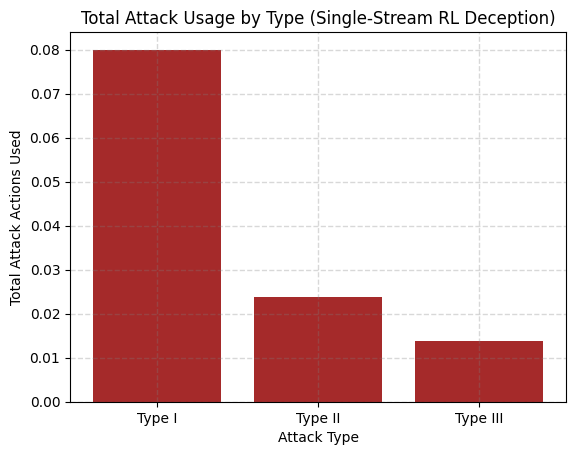

In [71]:
plt.rcdefaults()
i = 9  # Choose the attack variant (e.g. Agent1Attck)
actions = np.load(files_adv_act[i] + '.npy')  # shape: (runs, T, 5)
# print(actions)
# Flatten all actions into one array

budget = np.load(files_C[i] + '.npy')  # shape: (runs, T, 5)
actions[:,budget < 1] = 0


# # Count resource use: non-zero actions mean resource used
# resource_use = (actions != 0).astype(int)  # shape: (runs, T, 5)
# print(resource_use.shape)
# print(budget.shape)
# resource_use[:, budget < 1] = 0


flat_actions = actions.reshape(-1)  # shape: (runs * T * 5,)

# Count actions per type
type_I_count = np.isin(flat_actions, [1, 2, 3]).mean()
type_II_count = np.isin(flat_actions, [4, 5]).mean()
type_III_count = (flat_actions == 6).mean()
No_deception = (flat_actions == 0).mean()
attack_type_counts = [type_I_count/3, type_II_count/2, type_III_count]

# Bar plot
plt.bar(np.arange(3), attack_type_counts, color=colors[i])
plt.xticks(np.arange(3), ["Type I", "Type II", "Type III"])
plt.ylabel("Total Attack Actions Used")
plt.xlabel("Attack Type")
plt.grid(color='gray', linestyle='--', linewidth=1.0, alpha=0.3)
plt.title(f"Total Attack Usage by Type ({labels[i]})")
plt.show()


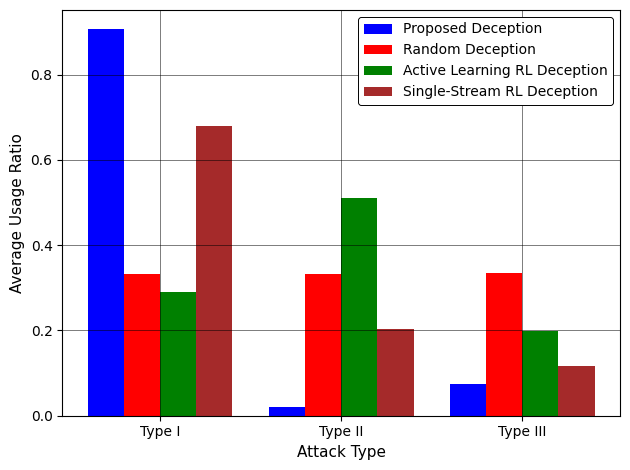

In [17]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcdefaults()

i_list = [8, 2, 7, 9]  # List of attack variants
attack_labels = [labels[i] for i in i_list]
n_types = 3  # Type I, II, III

width = 0.2  # Width of each bar
x = np.arange(n_types)  # Base x positions: [0, 1, 2]

# Initialize plot
fig, ax = plt.subplots()

for idx, i in enumerate(i_list):
    actions = np.load(files_adv_act[i] + '.npy')  # shape: (runs, T, 5)
    budget = np.load(files_C[i] + '.npy')         # shape: (runs, T, 5)
    
    actions[:, budget < 1] = 0
    flat_actions = actions.reshape(-1)

    # Compute average usage per type
    type_I = np.isin(flat_actions, [1, 2, 3]).mean() / 3
    type_II = np.isin(flat_actions, [4, 5]).mean() / 2
    type_III = (flat_actions == 6).mean()
    div_fact = type_I + type_II + type_III
    attack_type_counts = [type_I/div_fact, type_II/div_fact, type_III/div_fact]

    # Offset bars for each method
    ax.bar(x + idx * width, attack_type_counts, width=width, 
           label=labels[i], color=colors[i])

# Format plot
ax.set_xticks(x + width * (len(i_list)-1) / 2)
ax.set_xticklabels(["Type I", "Type II", "Type III"], fontsize=fontsize)
ax.set_ylabel("Average Usage Ratio", fontsize=fontsize)
ax.set_xlabel("Attack Type", fontsize=fontsize)
# ax.set_title("Comparison of Attack Type Usage Across Methods")
# plt.grid(color='gray', linestyle='-', linewidth=1.5, alpha=0.3)


legend = ax.legend(frameon=True, fontsize=fontsize-1)

# Customize legend frame to match the grid
frame = legend.get_frame()
frame.set_edgecolor('black')
frame.set_linestyle('-')
frame.set_linewidth(0.7)
frame.set_alpha(1)


ax.tick_params(axis='both', which='major', labelsize=fontsize-1)

plt.grid(color='black', linestyle='-', linewidth=0.4, alpha=0.9)



plt.tight_layout()
plt.savefig("res5.jpg", dpi=300)

plt.show()


In [12]:
i_list = [8, 2, 7, 9]  # List of attack variants
for idx, i in enumerate(i_list):
    actions = np.load(files_adv_act[i] + '.npy')  # shape: (runs, T, 5)
    budget = np.load(files_C[i] + '.npy')         # shape: (runs, T, 5)
    print(actions.shape)
    actions[:, budget < 1] = 0  # mask actions where budget is insufficient
    print(actions[:,1])
    print(f"\nMethod: {labels[i]}")
    for j in range(5):  # Loop over agents
        agent_actions = actions[j, :, :].reshape(-1)  # shape: (runs*T,)
        
        type_I = np.isin(agent_actions, [1, 2, 3]).mean() / 3
        type_II = np.isin(agent_actions, [4, 5]).mean() / 2
        type_III = (agent_actions == 6).mean()
        div_fact = type_I + type_II + type_III

        if div_fact > 0:
            ratios = [type_I / div_fact, type_II / div_fact, type_III / div_fact]
        else:
            ratios = [0.0, 0.0, 0.0]

        print(f"  Agent {j+1}:  {ratios[0]:.3f} & {ratios[1]:.3f} & {ratios[2]:.3f} &")


(5, 100, 500)
[[1. 1. 1. ... 0. 0. 0.]
 [3. 3. 3. ... 0. 0. 0.]
 [5. 5. 0. ... 0. 0. 0.]
 [3. 3. 3. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]

Method: Proposed Deception
  Agent 1:  0.911 & 0.016 & 0.073 &
  Agent 2:  0.984 & 0.012 & 0.004 &
  Agent 3:  0.921 & 0.075 & 0.004 &
  Agent 4:  0.675 & 0.009 & 0.316 &
  Agent 5:  0.983 & 0.009 & 0.007 &
(5, 100, 500)
[[2. 0. 6. ... 0. 0. 0.]
 [2. 1. 4. ... 0. 0. 0.]
 [3. 4. 4. ... 0. 0. 0.]
 [1. 0. 4. ... 0. 0. 0.]
 [4. 3. 4. ... 0. 0. 0.]]

Method: Random Deception
  Agent 1:  0.335 & 0.336 & 0.329 &
  Agent 2:  0.331 & 0.330 & 0.339 &
  Agent 3:  0.326 & 0.333 & 0.342 &
  Agent 4:  0.339 & 0.326 & 0.335 &
  Agent 5:  0.331 & 0.338 & 0.331 &
(5, 100, 500)
[[6. 6. 6. ... 0. 0. 0.]
 [4. 4. 4. ... 0. 0. 0.]
 [4. 4. 4. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]

Method: Active Learning RL Deception
  Agent 1:  0.018 & 0.522 & 0.461 &
  Agent 2:  0.050 & 0.691 & 0.259 &
  Agent 3:  0.308 & 0.691 & 0.002 &
  Agent 4:  0.554 & 

In [ ]:

seed: 77
M=0
Average reward is: -149.15 with a standard deviation of 27.968732541893992


M=100
Average reward is: -159.97 with a standard deviation of 35.05852394226119
M=200
Average reward is: -165.75 with a standard deviation of 38.35648181167946
M=300
Average reward is: -176.74 with a standard deviation of 32.60371795121569
M=400
Average reward is: -205.14 with a standard deviation of 36.533648527726804
M=500
Average reward is: -215.81 with a standard deviation of 39.203353546513455
M=600
Average reward is: -224.15 with a standard deviation of 34.642874994416786
M = 700
Average reward is: -255.5 with a standard deviation of 42.57886325349229
M = 800
Average reward is: -246.1 with a standard deviation of 46.67175296956956

M = 900
Average reward is: -235.75 with a standard deviation of 47.652228158658524



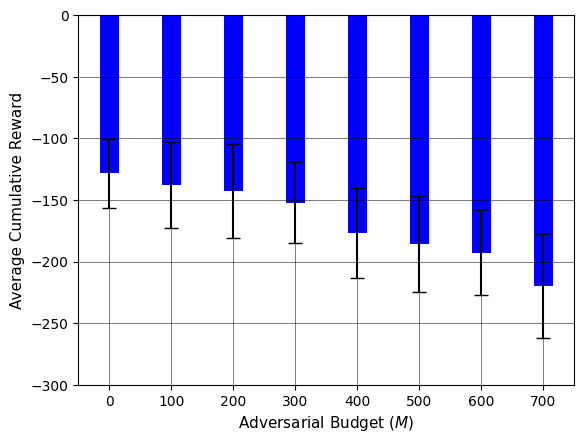

In [41]:
##### # Data
M_values = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]
avg_rewards = np.array([-149.15, -159.97, -165.75, -176.74, -205.14, -215.81, -224.15, -255.5, -246.1, -235.75])
std_devs = [27.97, 35.06, 38.36, 32.60, 36.53, 39.20, 34.64, 42.58, 46.67, 47.65]

# Plot
# plt.figure(figsize=(10, 6))
bars = plt.bar(M_values, avg_rewards*(0.999**150), yerr=std_devs, capsize=5, color='blue', width=30)
plt.ylim([-300, 0])
plt.xlim([-50, 750])
# Formatting
plt.xlabel("Adversarial Budget ($M$)", fontsize=11)
plt.ylabel("Average Cumulative Reward", fontsize=11)
# plt.title("Average Reward vs M (with Standard Deviation)", fontsize=14)
# plt.grid( alpha=0.7)
plt.grid(color='black', linestyle='-', linewidth=0.4, alpha=0.9)

# Save the figure
plt.savefig("res4.jpg", dpi=300)

# Show plot
plt.show()


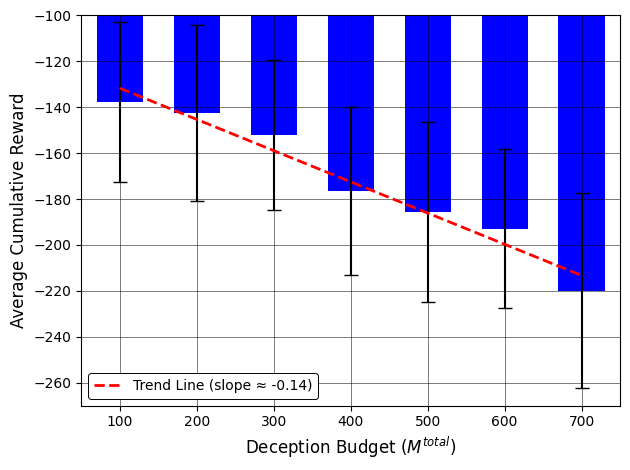

In [20]:
import numpy as np
import matplotlib.pyplot as plt
fontsize = 11
# Data
M_values = np.array([100, 200, 300, 400, 500, 600, 700])
avg_rewards_raw = np.array([-159.97, -165.75, -176.74, -205.14, -215.81, -224.15, -255.5])
std_devs = np.array([35.06, 38.36, 32.60, 36.53, 39.20, 34.64, 42.58])

# Optional: Apply discounting if intended
discount_factor = 0.999 ** 150
avg_rewards = avg_rewards_raw * discount_factor

# Linear regression for the trend line
slope, intercept = np.polyfit(M_values, avg_rewards, 1)
trend_line = slope * M_values + intercept

# Plotting
# plt.figure(figsize=(10, 6))
bars = plt.bar(M_values, avg_rewards, yerr=std_devs, capsize=5, color='blue', width=60)

# Plot the trend line
plt.plot(M_values, trend_line, color='red', linestyle='--', linewidth=2, label=f'Trend Line (slope ≈ {slope:.2f})')

# Axes limits and labels
plt.ylim([-270, -100])
plt.xlim([50, 750])
plt.xlabel("Deception Budget ($M^{total}$)", fontsize=12)
plt.ylabel("Average Cumulative Reward", fontsize=12)
legend = plt.legend(frameon=True, fontsize=fontsize-1)
# Customize legend frame to match the grid
frame = legend.get_frame()
frame.set_edgecolor('black')
frame.set_linestyle('-')
frame.set_linewidth(0.7)
frame.set_alpha(1)


plt.grid(color='black', linestyle='-', linewidth=0.4, alpha=0.9)
# Grid and legend
# plt.grid(True, linestyle='-', linewidth=0.4, alpha=0.8)
# plt.legend(fontsize=10)
plt.tight_layout()

# Save and show
plt.savefig("res4_improved.jpg", dpi=300)
plt.show()


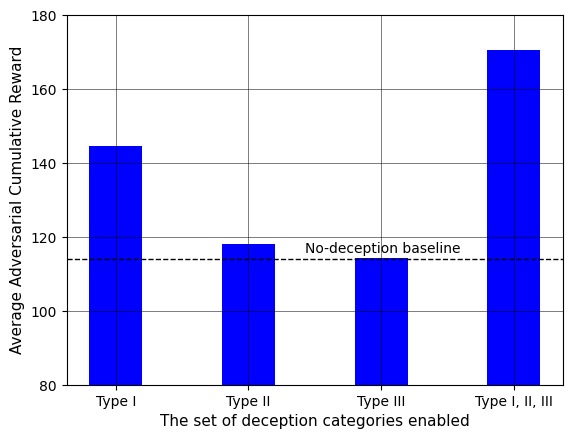

In [55]:

plt.rcdefaults()
gamma = 0.999
# Get all reward_list files
reward_files = [np.load("TurboTIAttck_reward_list.npy"), np.load("TurboTIIAttck_reward_list.npy"),np.load("TurboTIIIAttck_reward_list.npy"), np.load("TurboAttck_reward_list.npy")]
attack_labels = ["Type I", "Type II", "Type III", "Type I, II, III"]
color = ["blue", "blue", "blue", "blue"]
# Store final rewards for bar chart
final_rewards = []



j = -1
# --- Plot mean reward over time ---
for i, data in enumerate(reward_files):
    j += 1
    G_list = []
    for R in data:
        G = np.zeros_like(R)
        acc = 0.0
        for t in (range(len(R))):
            acc = R[t] + gamma * acc
            G[t] = acc
        G_list.append(G)

    G_list = np.array(G_list)  # Shape: (num_runs, T)
    G_mean = np.mean(G_list, axis=0)

    # Final reward stats
    final_rewards.append(-G_mean[-1])


# --- Bar plot of final rewards ---

x_pos = np.arange(len(attack_labels))
plt.bar(x_pos, final_rewards, color=color, width=0.4)
plt.ylim([80,180])
# Add dashed baseline at reward = 114
baseline = 114
plt.axhline(y=baseline, color='black', linestyle='--', linewidth=1)
plt.text(len(attack_labels)-1.4, baseline + 1, "No-deception baseline", 
         ha='right', va='bottom', fontsize=10, color='black')


plt.xticks(x_pos, attack_labels)
plt.ylabel("Average Adversarial Cumulative Reward", fontsize=11)
plt.xlabel("The set of deception categories enabled", fontsize=11)

plt.grid(color='black', linestyle='-', linewidth=0.4, alpha=0.9)

# Save the figure
plt.savefig("res6.jpg", dpi=300)
plt.show()


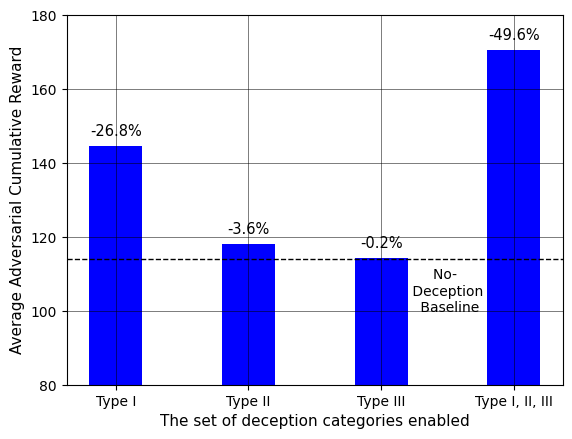

In [67]:
# --- Bar plot of final rewards ---
x_pos = np.arange(len(attack_labels))
plt.bar(x_pos, final_rewards, color=color, width=0.4)
plt.ylim([80, 180])

# Add dashed baseline at reward = 114
baseline = 114
plt.axhline(y=baseline, color='black', linestyle='--', linewidth=1)
plt.text(len(attack_labels) - 1.5, baseline - 15, "No- \n Deception \n Baseline",
         ha='center', va='bottom', fontsize=10, color='black')

# Add improvement percentage text on top of each bar
for i, reward in enumerate(final_rewards):
    improvement = ((baseline - reward) / baseline) * 100
    # if i != 2:
    plt.text(i, reward + 2, f"{improvement:.1f}%", ha='center', va='bottom', fontsize=10.5, color='black')

plt.xticks(x_pos, attack_labels)
plt.ylabel("Average Adversarial Cumulative Reward", fontsize=11)
plt.xlabel("The set of deception categories enabled", fontsize=11)

plt.grid(color='black', linestyle='-', linewidth=0.4, alpha=0.9)

# Save the figure
plt.savefig("res6.jpg", dpi=300)
plt.show()


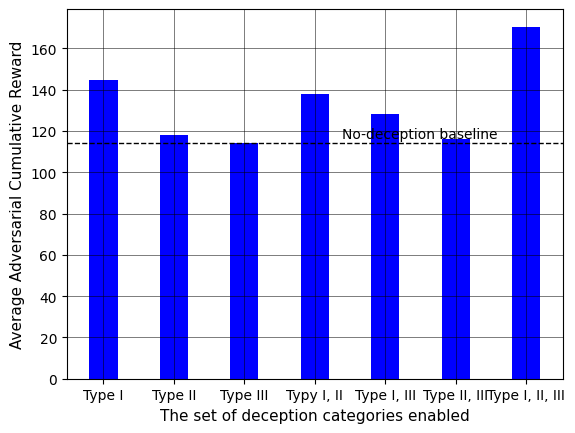

In [53]:

plt.rcdefaults()
gamma = 0.999
# Get all reward_list files
reward_files = [np.load("TurboTIAttck_reward_list.npy"), np.load("TurboTIIAttck_reward_list.npy"),np.load("TurboTIIIAttck_reward_list.npy"),np.load("TurboTITIIIAttck_reward_list.npy") ,np.load("TurboTITIIAttck_reward_list.npy"), np.load("TurboTIIITIIAttck_reward_list.npy"), np.load("TurboAttck_reward_list.npy")]
attack_labels = ["Type I", "Type II", "Type III", "Typy I, II", "Type I, III", "Type II, III", "Type I, II, III"]
color = ["blue", "blue", "blue", "blue", "blue", "blue", "blue"]
# Store final rewards for bar chart
final_rewards = []



j = -1
# --- Plot mean reward over time ---
for i, data in enumerate(reward_files):
    j += 1
    G_list = []
    for R in data:
        G = np.zeros_like(R)
        acc = 0.0
        for t in (range(len(R))):
            acc = R[t] + gamma * acc
            G[t] = acc
        G_list.append(G)

    G_list = np.array(G_list)  # Shape: (num_runs, T)
    G_mean = np.mean(G_list, axis=0)

    # Final reward stats
    final_rewards.append(-G_mean[-1])


# --- Bar plot of final rewards ---

x_pos = np.arange(len(attack_labels))
plt.bar(x_pos, final_rewards, color=color, width=0.4)

# Add dashed baseline at reward = 114
baseline = 114
plt.axhline(y=baseline, color='black', linestyle='--', linewidth=1)
plt.text(len(attack_labels)-1.4, baseline + 1, "No-deception baseline", 
         ha='right', va='bottom', fontsize=10, color='black')


plt.xticks(x_pos, attack_labels)
plt.ylabel("Average Adversarial Cumulative Reward", fontsize=11)
plt.xlabel("The set of deception categories enabled", fontsize=11)

plt.grid(color='black', linestyle='-', linewidth=0.4, alpha=0.9)

# Save the figure
plt.savefig("res6.jpg", dpi=300)
plt.show()


In [27]:
import numpy as np
gamma = 0.99
R_max = 0.1
# First 167 steps 
T = 167
R_gap = -1
# R_max = (-5 -10 -5 -3  -5 -3) / 5
R_max = (-3 -5 -3 -1 -3 -1)/5
R_max = (-3 -5 -3 -1 -3 -1)/5
print(R_max)
s = R_gap
# for i in range(1, T):
for i in range(1, 100):
    s += (gamma**i)*R_max
print(s)
# R_max = (-5 -6 -20 -3  -3) / 5
R_max = (-3 -0 -3 -10 -1 -1)/5
R_max = (-3 -0 -3 -10 -1 -1)/5
print(R_max)
# for i in range(167, T+167):
# for i in range(167, 300):
#     s += (gamma**i)*R_max
# print(s)
# R_max = (-5 -7 -3 -6 -20) / 5
# R_max = (-3 -0 -3 -1 -3 -10)/5
# R_max = (-3 -0 -3 -1 -3 -10)/5
# print(R_max)
# for i in range(167+167, T+167+166):
#     s += (gamma**i)*R_max
# print(s)

-3.2
-302.465129236131
-3.6


-3.6
-958.8886905268749


-4.0
-1397.1094369336001


Table 4A: Rewards for green action failures and compromise in Phase 1 O&M
Zone	Local Work Fails	Access Service Fails	Red impact/access

HQ Network	         -1	-1	-3
Contractor Network	 0	-5	-5
Restricted Zone A	-1	-3	-1
Operational Zone A	-1	-1	-1
Restricted Zone B	-1	-3	-1
Operational Zone B	-1	-1	-1
Internet             0	0	0

#167 steps 

Table 4B: Rewards for green action failures and compromise in Phase 2a - Mission A
Zone	Local Work Fails	Access Service Fails	Red impact/access
HQ Network	        -1	-1	-3
Contractor Network	 0	0	0
Restricted Zone A	-2	-1	-3
Operational Zone A	-10	 0	-10
Restricted Zone B	-1	-1	-1
Operational Zone B	-1	-1	-1
Internet	        0	0	0

#167 steps

Table 4C: Rewards for green action failures and compromise in Phase 2b - Mission B
Zone	Local Work Fails	Access Service Fails	Red impact/access
HQ Network	       -1	-1	-3
Contractor Network	0	0	0
Restricted Zone A	-1	-3	-3
Operational Zone A	-1	-1	-1
Restricted Zone B	-2	-1	-3
Operational Zone B	-10	0	-10
Internet	         0	0	0

In [57]:
print(46.02326100250404 -61.26901057532222)
print(45.36808519493723 -60.38688857765433)
print(28.70984893792421 -35.110737754510524)





-15.245749572818177
-15.018803382717103
-6.400888816586313


In [59]:
print(132.9480190529955 -195.2608424572767)
print(113.22751570759321 -169.91282390967922)
print(45.74241219573299 -57.68525295141743)





-62.312823404281204
-56.685308202086006
-11.942840755684443
